# *Clustering*

Los métodos de *clustering* son modelos de agrupamiento de objetos (instancias/registros) por similitud. El resultado son grupos o conjuntos de forma que los miembros de un mismo grupo presenta características similares.

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

In [1]:
# Librerías
import numpy as np
import os

# Semilla
np.random.seed(42)

# Configuración de gráficas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Directorio y creación de imágenes
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Configuración de los warnings
import warnings
warnings.filterwarnings(action="ignore")# , message="^internal gelsd")

## Introducción – Classificación *vs* *Clustering*

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Saving figure classification_vs_clustering_plot


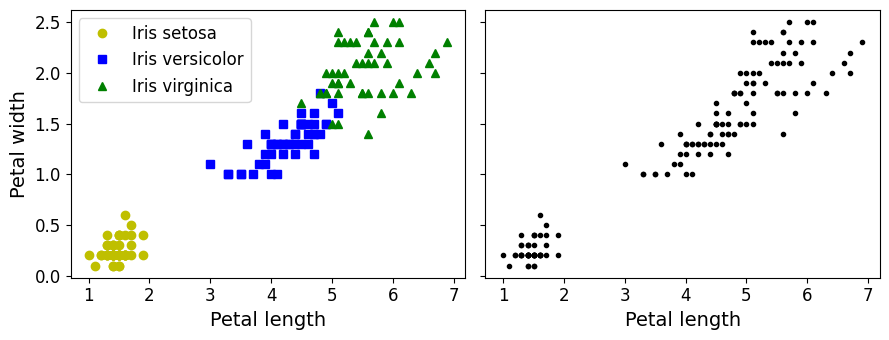

In [4]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

save_fig("classification_vs_clustering_plot")
plt.show()

Ajustamos un modelo *K-Means* utilizando las cuatro variables explicativas: *petal length*, *petal width*, *sepal length* y *sepal width*.

In [5]:
from sklearn.cluster import KMeans

k = 3

kmeans = KMeans(n_clusters=k, random_state=101)

y_pred = kmeans.fit_predict(X)



In [6]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
mapping = np.array([1,0,2])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

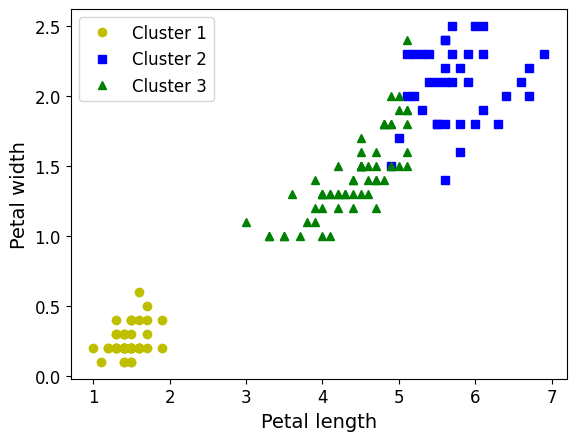

In [9]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [10]:
np.sum(y_pred==y) #cuantos registros coinciden

66

In [11]:
len(y_pred) #el total de los registros

150

In [12]:
np.sum(y_pred==y) / len(y_pred)

0.44

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred, y)

array([[50,  0,  0],
       [ 0,  2, 36],
       [ 0, 48, 14]], dtype=int64)

## *K-Means*

Generamos de forma aleatoria algunos puntos:

In [52]:
from sklearn.datasets import make_blobs #este dataset nos sirve para generar una nube de puntos de manera aleatorio (no es un dataset fijo)

In [15]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [16]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=57)

In [17]:
print(X)
print(y)

[[-1.58679927  2.4149127 ]
 [-2.81085691  1.38406758]
 [-2.76597514  1.20271661]
 ...
 [-1.23045514  2.99231172]
 [ 0.34365803  2.43625755]
 [-2.60998287  2.94929628]]
[1 4 4 ... 1 0 3]


Visualicemos los puntos:

In [18]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

Saving figure blobs_plot


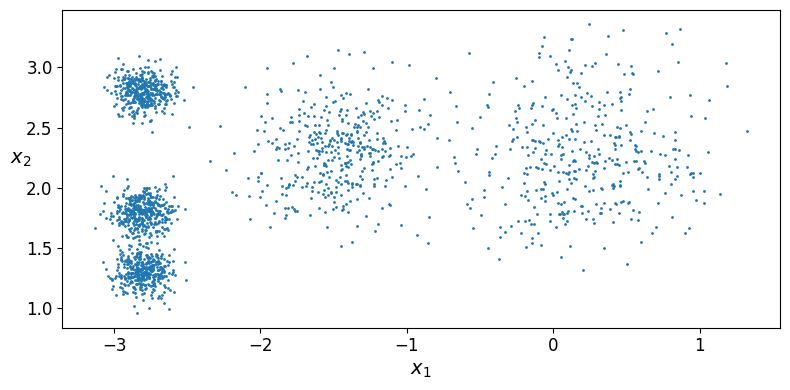

In [19]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show()

### Ajustar y agrupar

Vamos a entrenar un algoritmo  *K-Means* con este *dataset*. Intentará encontrar los centroides (el centro de cada cluster) de cada grupo y asignará a cada instancia el centroide más cercano:

In [20]:
from sklearn.cluster import KMeans

In [21]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

Cada instancia ha sido asignada a uno de los 5 clusters:

In [22]:
np.unique(y_pred)

array([0, 1, 2, 3, 4])

In [23]:
kmeans.labels_

array([2, 4, 4, ..., 2, 1, 3])

In [24]:
y_pred is kmeans.labels_

True

Y a continuación, los 5 centroides que han sido estimados:

In [25]:
kmeans.cluster_centers_

array([[-2.80019258,  1.80527459],
       [ 0.21808728,  2.27509486],
       [-1.45453331,  2.30412352],
       [-2.79665244,  2.80173317],
       [-2.80061254,  1.3031465 ]])

Tenga en cuenta que el algoritmo `KMeans` conserva las etiquetas de las instancias (registros) con las que fue entrenada. De forma algo confusa, en este contexto, la *etiqueta* de una instancia es el índice del *cluster* al que se asigna esa instancia:

In [26]:
kmeans.labels_

array([2, 4, 4, ..., 2, 1, 3])

Por supuesto, podemos predecir las etiquetas de las nuevas instancias:

In [27]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5], [-1,2], [-2.5,1.5]])
kmeans.predict(X_new)

array([1, 1, 3, 3, 2, 4])

### Límites de decisión (fronteras)

Vamos a visualizar los límites de decisión del modelo. Para ello utilizaremos el Diagrama de Voronoi:

In [28]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure voronoi_plot


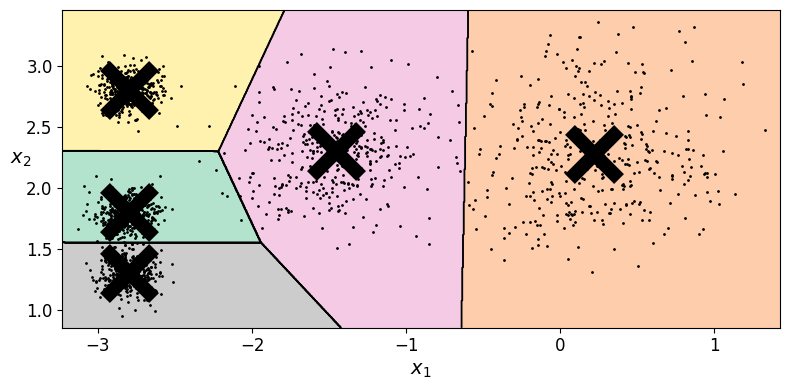

In [29]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

No está mal. Algunas instancias se situan cerca de las fronteras (probablemente se asignaron al cluster equivocado), pero en general se ve bastante bien.

### *Hard Clustering vs Soft Clustering*

En lugar de elegir arbitrariamente el *cluster* más cercano para cada instancia, lo que se denomina *hard clustering*, sería mejor medir la distancia de cada instancia a los 5 centroides. Esto es lo que hace el método `transform()`:

In [30]:
X_new

array([[ 0. ,  2. ],
       [ 3. ,  2. ],
       [-3. ,  3. ],
       [-3. ,  2.5],
       [-1. ,  2. ],
       [-2.5,  1.5]])

In [31]:
kmeans.predict(X_new) #etiketa que asigna a cada cluster

array([1, 1, 3, 3, 2, 4])

In [32]:
kmeans.transform(X_new) #la distancia a cada cluster (como lo de las probabilidades)

array([[2.80695502, 0.35105447, 1.4859873 , 2.90930249, 2.88600683],
       [5.80346035, 2.79548128, 4.46490292, 5.85183353, 5.84232066],
       [1.21131821, 3.29872296, 1.69490748, 0.28400698, 1.70852777],
       [0.72288754, 3.22593677, 1.55783019, 0.36385867, 1.21334812],
       [1.8106936 , 1.24876491, 0.54689272, 1.96741863, 1.93075382],
       [0.42814503, 2.82644131, 1.31894475, 1.33510745, 0.3593316 ]])

Puede comprobar que se trata efectivamente de la distancia euclidia entre cada instancia y cada centroide:

In [33]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[2.80695502, 0.35105447, 1.4859873 , 2.90930249, 2.88600683],
       [5.80346035, 2.79548128, 4.46490292, 5.85183353, 5.84232066],
       [1.21131821, 3.29872296, 1.69490748, 0.28400698, 1.70852777],
       [0.72288754, 3.22593677, 1.55783019, 0.36385867, 1.21334812],
       [1.8106936 , 1.24876491, 0.54689272, 1.96741863, 1.93075382],
       [0.42814503, 2.82644131, 1.31894475, 1.33510745, 0.3593316 ]])

### Algoritmo *K-Means*

El algoritmo *K-Means* es uno de los algoritmos de *cluster* más rápidos, pero también uno de los más sencillos:
* Primero se inicializan $k$ centroides aleatoriamente (si `init="random"`, por defecto, `init="k-means++"`): se eligen $k$ instancias distintas aleatoriamente del conjunto de datos y se colocan los centroides en sus ubicaciones.
* Repetir hasta la convergencia (es decir, hasta que los centroides dejen de moverse):
    * Asignar cada instancia al centroide más cercano.
    * Actualizar los centroides para que sean la media de las instancias que se les han asignado.

La clase `KMeans` aplica por defecto un algoritmo optimizado (`init="k-means++"`). Para obtener el algoritmo original de *K-Means* (solo con fines educativos), debes establecer `init="random"`, `n_init=1` y `algorithm = "full"`. Estos hiperparámetros se explicaran más adelante. 

Vamos a ejecutar el algoritmo *K-Means* durante 1,2 y 3 iteraciones, para ver cómo se mueven los centroides.

In [34]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=2024)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=2024)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=2024)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=2024)

Y los visualizamos:

Saving figure kmeans_algorithm_plot


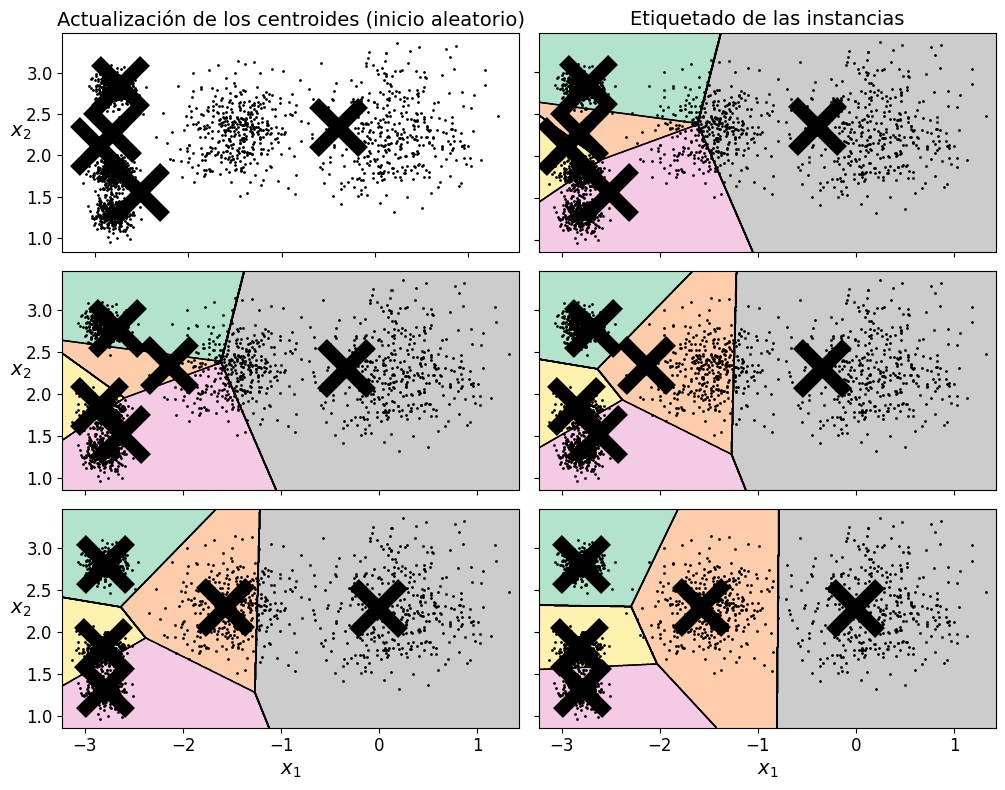

In [35]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_)#, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Actualización de los centroides (inicio aleatorio)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Etiquetado de las instancias", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("kmeans_algorithm_plot")
plt.show()

### Variabilidad de *K-Means*

En el algoritmo original de *K-Means*, los centroides se inicializan aleatoriamente, y el algoritmo simplemente ejecuta una única iteración para mejorar gradualmente los centroides, como vimos anteriormente.

Sin embargo, uno de los principales problemas de este enfoque es que si ejecuta *K-Means* varias veces (o con diferentes semillas aleatorias), puede converger a soluciones muy diferentes, como puede ver a continuación:

In [36]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

Saving figure kmeans_variability_plot


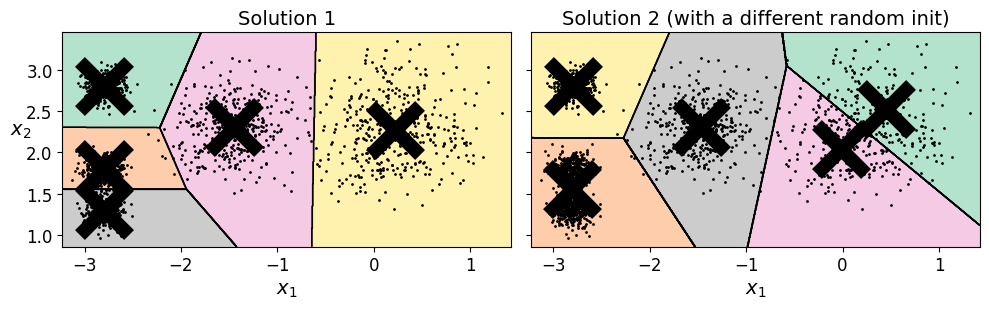

In [37]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

save_fig("kmeans_variability_plot")
plt.show()

### Inercia

Para seleccionar el mejor modelo, necesitaremos una forma de evaluar el rendimiento de un modelo *K-Mean*. Por desgracia, el *clustering* es una tarea no supervisada, por lo que no disponemos de los valores de una variable objetivo. Pero al menos podemos medir la distancia entre cada instancia y su centroide. Esta es la idea en la que se basa la métrica *inertia*:

In [38]:
kmeans.inertia_

224.28169923610295

In [39]:
print(kmeans_iter1.inertia_) #cuanto menor sea la inercia mejor
print(kmeans_iter2.inertia_)
print(kmeans_iter3.inertia_)

765.9422945566737
514.5073874697356
248.828359406284


Como se puede comprobar fácilmente, la inercia es la suma de las distancias al cuadrado entre cada instancia de entrenamiento y su centroide más cercano:

In [40]:
kmeans.transform(X)

array([[1.35793298, 1.81029403, 0.17253558, 1.27018691, 1.64601542],
       [0.42134199, 3.15728245, 1.63893766, 1.41773675, 0.08156695],
       [0.60352875, 3.17090264, 1.7125936 , 1.5993108 , 0.10623518],
       ...,
       [1.96802764, 1.61637717, 0.72374996, 1.57774972, 2.30622492],
       [3.20654584, 0.20430719, 1.80303951, 3.16150634, 3.34221156],
       [1.15972642, 2.90732322, 1.32337129, 0.23795042, 1.6571508 ]])

In [41]:
kmeans.labels_

array([2, 4, 4, ..., 2, 1, 3])

In [42]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

224.28169923610275

El método `score()` devuelve la inercia negativa. ¿Por qué negativa? Pues porque el método `score()` de un predictor debe respetar siempre la regla "*grande es mejor*" (transformarlo a un problema de maximización).

In [43]:
kmeans.score(X) #inercia negativa

-224.28169923610292

### Inicializaciones múltiples

Por tanto, un método para resolver el problema de la variabilidad consiste simplemente en ejecutar el algoritmo K-Means varias veces con diferentes inicializaciones aleatorias y seleccionar la solución que minimice la inercia. Por ejemplo, aquí están las inercias de los dos modelos "malos" mostrados en la figura anterior:

In [44]:
kmeans_rnd_init1.inertia_

224.28169923610295

In [45]:
kmeans_rnd_init2.inertia_

230.15509929063057

Como puedes ver, el segundo modelo obtiene peor inercia que el primero.

Al establecer el hiperparámetro `n_init`, Scikit-Learn ejecuta el algoritmo original `n_init` veces y selecciona la solución que minimiza la inercia. Por defecto, Scikit-Learn establece `n_init=10`.

In [46]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, n_init=10,
       random_state=11)

In [47]:
kmeans_rnd_10_inits.inertia_

224.28169923610295

Como se puede ver, terminamos con el modelo inicial, que es sin duda la solución óptima de K-Means (al menos en términos de inercia, y suponiendo $k=5$).

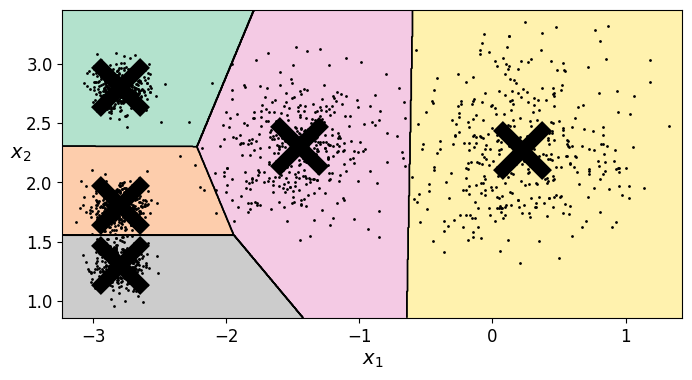

In [48]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

### *K-Means++*

En lugar de inicializar los centroides de forma totalmente aleatoria, es preferible inicializarlos utilizando el siguiente algoritmo, propuesto en un [documento de 2006](https://goo.gl/eNUPw6) por David Arthur y Sergei Vassilvitskii:
* Tomar un centroide $c_1$, elegido uniformemente al azar del conjunto de datos.
* Tomar un nuevo centroide $c_i$, eligiendo una instancia $\mathbf{x}_i$ con probabilidad $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$ donde $D(\mathbf{x}_i)$ es la distancia entre la instancia $\mathbf{x}_i$ y el centroide más cercano ya elegido. Esta distribución de probabilidad asegura que las instancias que están más lejos de los centroides ya elegidos tienen muchas más probabilidades de ser seleccionadas como centroides (el numerador tiene mayor eso).
* Repita el paso anterior hasta que se hayan elegido todos los $k$ centroides.

El resto del algoritmo K-Means++ es un K-Means normal. Con esta inicialización, es mucho menos probable que el algoritmo K-Means converja a una solución subóptima, por lo que es posible reducir `n_init` considerablemente. La mayoría de las veces, esto compensa en gran medida la complejidad adicional del proceso de inicialización.

Para establecer la inicialización a K-Means++, simplemente establezca `init="k-means++"` (es el valor predeterminado):

In [49]:
KMeans()

KMeans()

In [50]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

224.28169923610295

### Accelerated K-Means

El algoritmo K-Means puede acelerarse significativamente evitando muchos cálculos de distancia innecesarios: esto se consigue explotando la desigualdad triangular (dados tres puntos A, B y C, la distancia AC es siempre tal que AC ≤ AB + BC) y manteniendo un registro de los límites inferior y superior de las distancias entre instancias y centroides (para más detalles, véase este [artículo de 2003](https://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf) de Charles Elkan).

Para utilizar la variante de Elkan de K-Means, basta con establecer `algorithm="elkan"`. Tenga en cuenta que no es compatible con datos dispersos, por lo que, por defecto, Scikit-Learn utiliza `"elkan"` para datos densos, y `"full"` (el algoritmo normal de K-Means) para datos dispersos.

In [51]:
%timeit -n 50 KMeans(algorithm="elkan").fit(X) #para usar el accelerated k-mean poner: algorith='elkan

53.5 ms ± 5.66 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [52]:
%timeit -n 50 KMeans(algorithm="full").fit(X)

24.7 ms ± 1.86 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


### *Mini-Batch K-Means*

Scikit-Learn también implementa una variante del algoritmo K-Means que admite minilotes (véase [este artículo](http://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf)):

In [53]:
from sklearn.cluster import MiniBatchKMeans #admite minilotes (mas rapido que el kmeans original)

In [54]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [55]:
minibatch_kmeans.inertia_

230.059350927226

*Mini-batch K-Means* es más rápido que *K-Means*:

In [56]:
%timeit KMeans(n_clusters=5).fit(X)

16.3 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [57]:
%timeit MiniBatchKMeans(n_clusters=5).fit(X)

7.61 ms ± 683 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Podemos observar que es más rápido. Sin embargo, su rendimiento suele ser inferior (mayor inercia), y sigue degradándose a medida que *k* aumenta. Tracemos la relación de inercia y la relación de tiempo de entrenamiento entre *Mini-batch K-Means* y *K-Means*:

In [58]:
from timeit import timeit

In [59]:
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

2/100

19/100

KeyboardInterrupt: 

Saving figure minibatch_kmeans_vs_kmeans


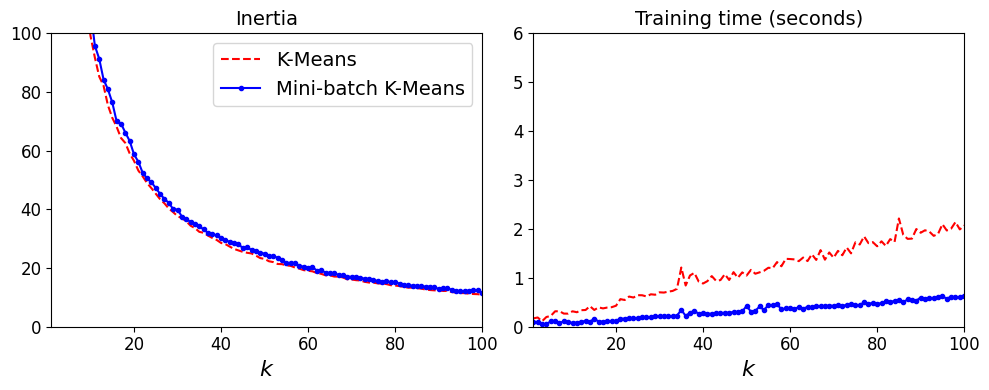

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

save_fig("minibatch_kmeans_vs_kmeans")
plt.show()

### Encontrar el número óptimo de *clusters*

¿Qué pasaría si el número de *clusters* se fijara en un valor inferior o superior a 5?

Saving figure bad_n_clusters_plot


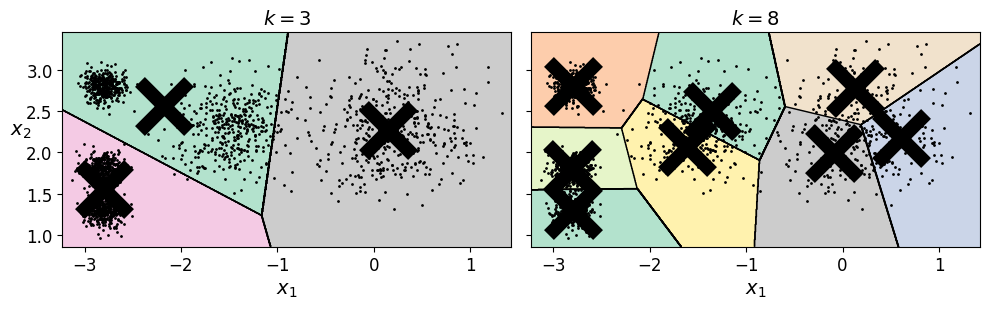

In [60]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
save_fig("bad_n_clusters_plot")
plt.show()

Ouch, estos modelos no se ven muy bien ¿Y sus inercias?

In [61]:
kmeans_k3.inertia_

664.8000228351231

In [62]:
kmeans_k8.inertia_

123.70494437745111

No, no podemos tomar simplemente el valor de *k* que minimiza la inercia, ya que ésta sigue disminuyendo a medida que aumentamos *k*. De hecho, cuantos más *clusters* haya, más cerca estará cada instancia de su centroide más cercano y, por tanto, menor será la inercia. Sin embargo, podemos representar la inercia en función de *k* y analizar la curva resultante:

In [63]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [64]:
import pandas as pd

In [65]:
df_kmeans = pd.DataFrame(inertias, columns=['inertia'])
df_kmeans['inertia_1'] = df_kmeans['inertia'].shift(1)
df_kmeans['diff%'] = df_kmeans['inertia']/df_kmeans['inertia_1']
df_kmeans

inertia    inertia_1     diff%
0  3556.600481          NaN       NaN
1  1174.863627  3556.600481  0.330333
2   664.800023  1174.863627  0.565853
3   274.861326   664.800023  0.413450
4   224.281699   274.861326  0.815981
5   179.403323   224.281699  0.799902
6   148.024575   179.403323  0.825094
7   123.704944   148.024575  0.835705
8   110.339491   123.704944  0.891957

In [66]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Saving figure inertia_vs_k_plot


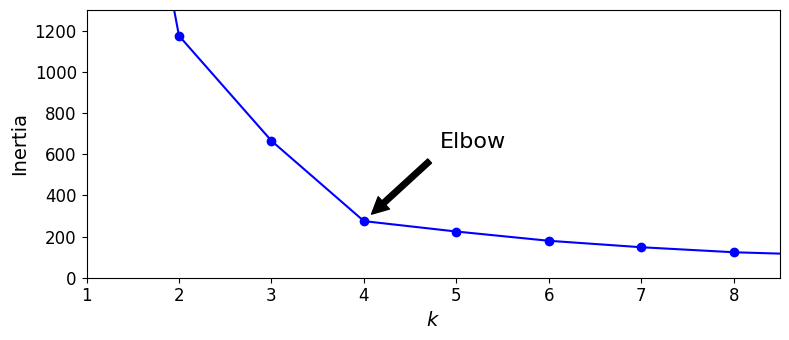

In [67]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
save_fig("inertia_vs_k_plot")
plt.show()

Como se puede ver, hay un codo en *k=4*, lo que significa que menos agrupaciones (*clusters*) que ésa serían malas, y más agrupaciones (*clusters*) no ayudarían mucho y podrían reducir las agrupaciones (*clusters*) a la mitad. Así que *k=4* es una buena elección. Por supuesto, este ejemplo no es perfecto, ya que significa que las dos nubes de puntos de la parte inferior izquierda se considerarán como un solo *cluster*, pero no deja de ser una agrupación (*cluster*) bastante buena.

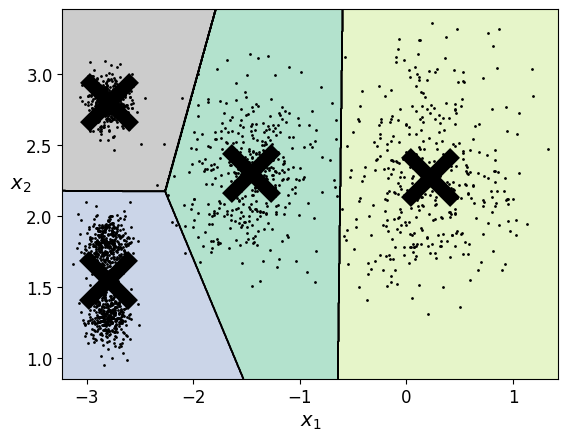

In [68]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

Otro enfoque consiste en observar la puntuación de silueta (*silhouette score*), que es el coeficiente de silueta medio de todas las instancias. El coeficiente de silueta de una instancia es igual a $(b - a)/\max(a, b)$ donde $a$ es la distancia media a las otras instancias del mismo *cluster* (es la **distancia media intra-cluster**), y $b$ es la **distancia media al cluster más cercano**, es decir, la distancia media a las instancias del siguiente *cluster* más cercano (definido como el que minimiza $b$, excluyendo el propio *cluster* de la instancia). El coeficiente de silueta puede variar entre -1 y +1: un coeficiente cercano a +1 significa que la instancia está bien *centrada/incluida* de su propio *cluster* y lejos de otros *clusters*, mientras que un coeficiente cercano a 0 significa que está cerca del límite de un *cluster* (cerca de la frontera del *cluster*), y finalmente un coeficiente cercano a -1 significa que la instancia puede haber sido asignada al *cluster* equivocado.

Vamos a visualizar la puntuación de la silueta en función de $k$:

In [42]:
from sklearn.cluster import KMeans

In [41]:
from sklearn.metrics import silhouette_score

In [71]:
silhouette_score(X, kmeans.labels_)

0.6479922527949502

In [72]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

Saving figure silhouette_score_vs_k_plot


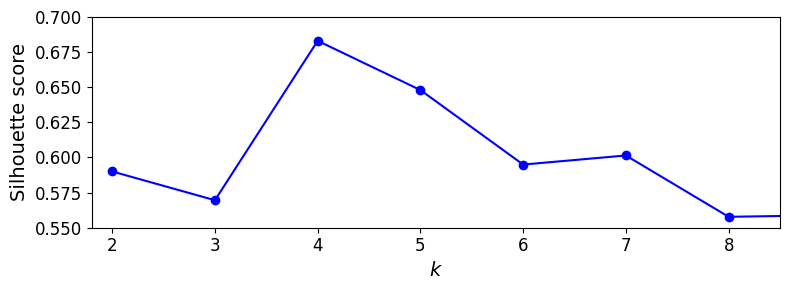

In [73]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k_plot")
plt.show()

Como puede ver, esta visualización es mucho más rica que la anterior: en particular, aunque confirma que $k=4$ es una muy buena elección, también subraya el hecho de que $k=5$ es bastante buena también.

Una visualización aún más informativa se obtiene cuando se representa el coeficiente de silueta de cada instancia, ordenado por el cluster al que está asignado y por el valor del coeficiente. Esto se denomina diagrama de siluetas (*silhouette diagram*):

Saving figure silhouette_analysis_plot


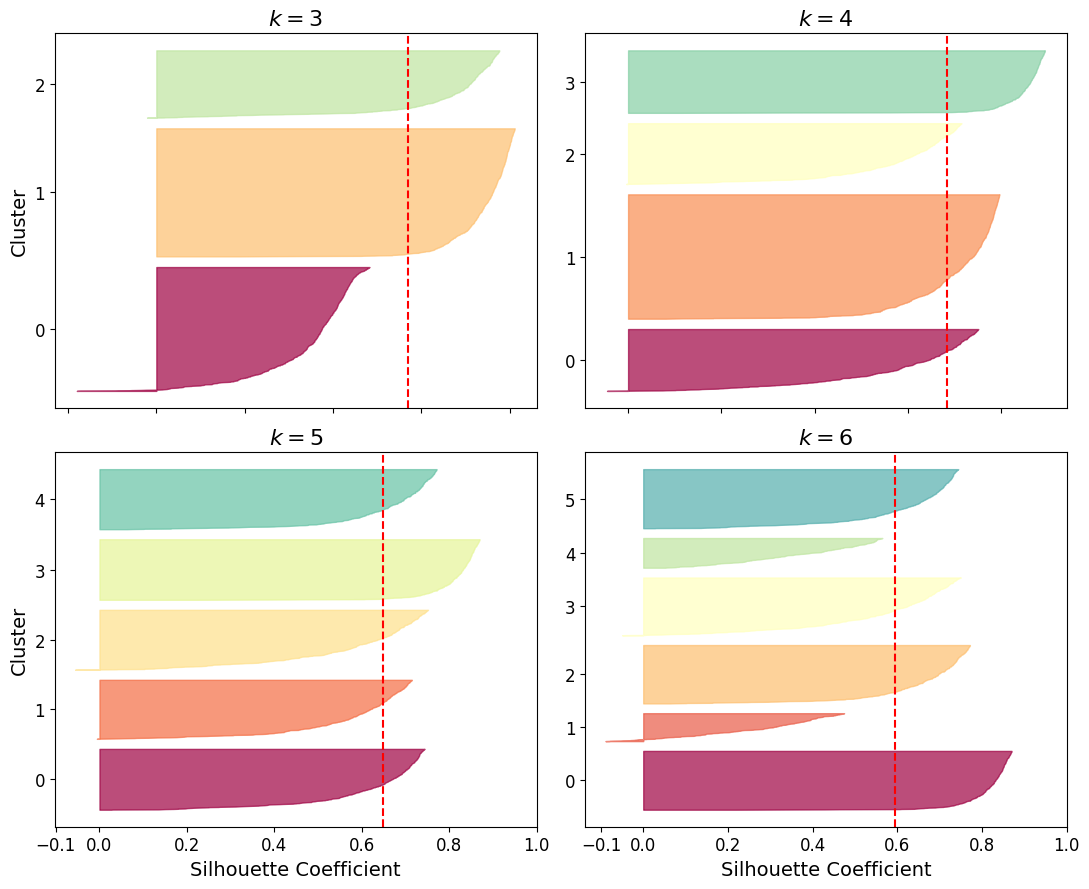

In [74]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()

### Límites del algoritmo *K-Means*

In [75]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

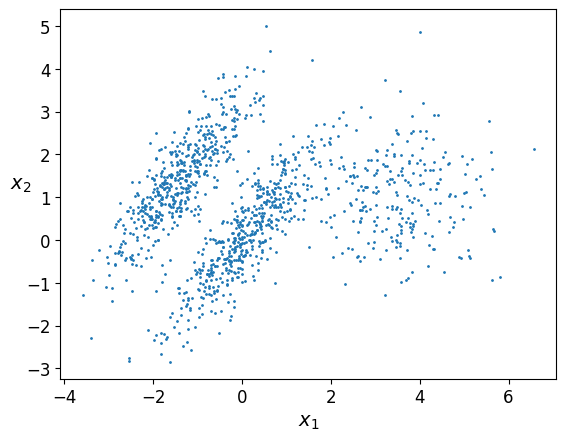

In [76]:
plot_clusters(X)

In [77]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

Saving figure bad_kmeans_plot


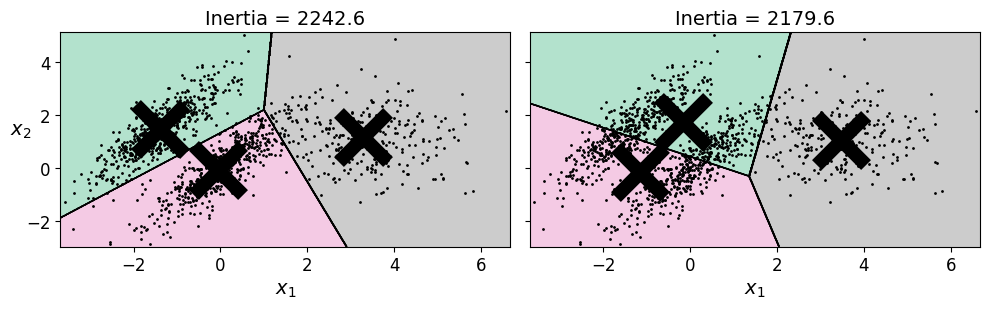

In [78]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

save_fig("bad_kmeans_plot")
plt.show()

## Caso de uso

### Aplicar *clustering* para la segmentación de imágenes

In [2]:
import urllib
import os 
from sklearn.cluster import KMeans
from matplotlib.image import imread
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl

images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x2234bc15810>)

In [3]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

seed = 42
# los píxeles están normalizados
image = imread("./images/unsupervised_learning/ladybug.png")
image.shape #estructura de la imagen

(533, 800, 3)

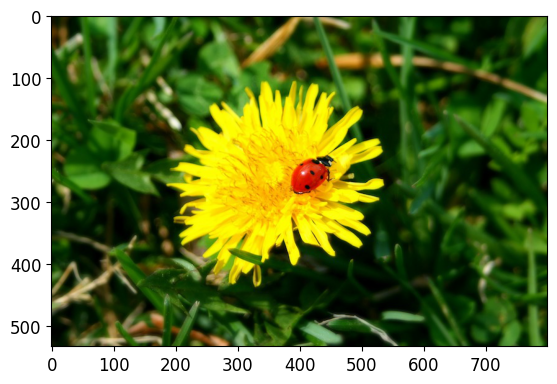

In [82]:
plt.imshow(image);

In [83]:
533*800*3 #numero de pixxeles de las diferentes escalas de colores

1279200

In [84]:
image.size

1279200

In [88]:
image[0] #Para acceder a cada una de las diferentes extructuras. Escala rgb.

array([[0.09803922, 0.11372549, 0.00784314],
       [0.09411765, 0.10980392, 0.00392157],
       [0.09411765, 0.11372549, 0.        ],
       ...,
       [0.22352941, 0.4117647 , 0.08235294],
       [0.21960784, 0.40392157, 0.08627451],
       [0.20392157, 0.3882353 , 0.07450981]], dtype=float32)

In [86]:
image[0][0] #aqui accedemos 

array([0.09803922, 0.11372549, 0.00784314], dtype=float32)

In [89]:
image[300][400][2] # azul del píxel 300 alto y 400 ancho

0.015686275

In [91]:
max_value = 0
for fila in image:
    for altura in fila:
        if max(altura) > max_value:
            max_value = max(altura)
print(max_value)

1.0


In [93]:
image.reshape(-1,3).shape  # 533x800 por cada color. Tres columnas. Cada columna representa cada color

(426400, 3)

In [94]:
image.reshape(-1,3)[0]

array([0.09803922, 0.11372549, 0.00784314], dtype=float32)

In [95]:
X = image.reshape(-1, 3)
X.shape

(426400, 3)

In [102]:
kmeans = KMeans(n_clusters=10, random_state=seed).fit(X)

In [97]:
kmeans.labels_

array([0, 0, 0, ..., 8, 8, 8])

In [98]:
kmeans.cluster_centers_[kmeans.labels_]

array([[0.01748195, 0.09570548, 0.00519249],
       [0.01748195, 0.09570548, 0.00519249],
       [0.01748195, 0.09570548, 0.00519249],
       ...,
       [0.07092501, 0.21520537, 0.01159022],
       [0.07092501, 0.21520537, 0.01159022],
       [0.07092501, 0.21520537, 0.01159022]], dtype=float32)

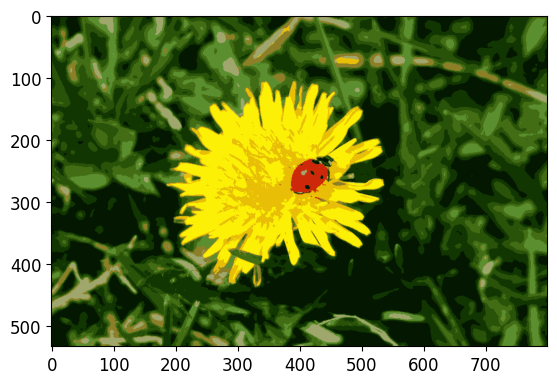

In [103]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
#print("segmented_img:", segmented_img)

plt.imshow(segmented_img) #La imagen con 10 centroides (10 colores distintos)

In [105]:
segmented_img.shape

(533, 800, 3)

In [104]:
print("resolución image:", image.shape)
print("primera fila:", image[0].shape)
print("primera fila & primera columna:", image[0][0].shape)
print("primera fila & primera columna:", image[0][0])

resolución image: (533, 800, 3)
primera fila: (800, 3)
primera fila & primera columna: (3,)
primera fila & primera columna: [0.09803922 0.11372549 0.00784314]


In [106]:
print(image[0][1])
print(image[0][0])
print(image[0][2])

[0.09411765 0.10980392 0.00392157]
[0.09803922 0.11372549 0.00784314]
[0.09411765 0.11372549 0.        ]


In [107]:
print(segmented_img[0][1])
print(segmented_img[0][0])
print(segmented_img[0][2])

[0.01748195 0.09570548 0.00519249]
[0.01748195 0.09570548 0.00519249]
[0.01748195 0.09570548 0.00519249]


In [4]:
segmented_imgs = []
n_colors = (20,18,16,14,12, 10)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

NameError: name 'X' is not defined

In [109]:
kmeans.cluster_centers_

array([[0.86087835, 0.80052936, 0.10488346],
       [0.13372383, 0.26555312, 0.04000342]], dtype=float32)

ValueError: num must be an integer with 1 <= num <= 6, not 7

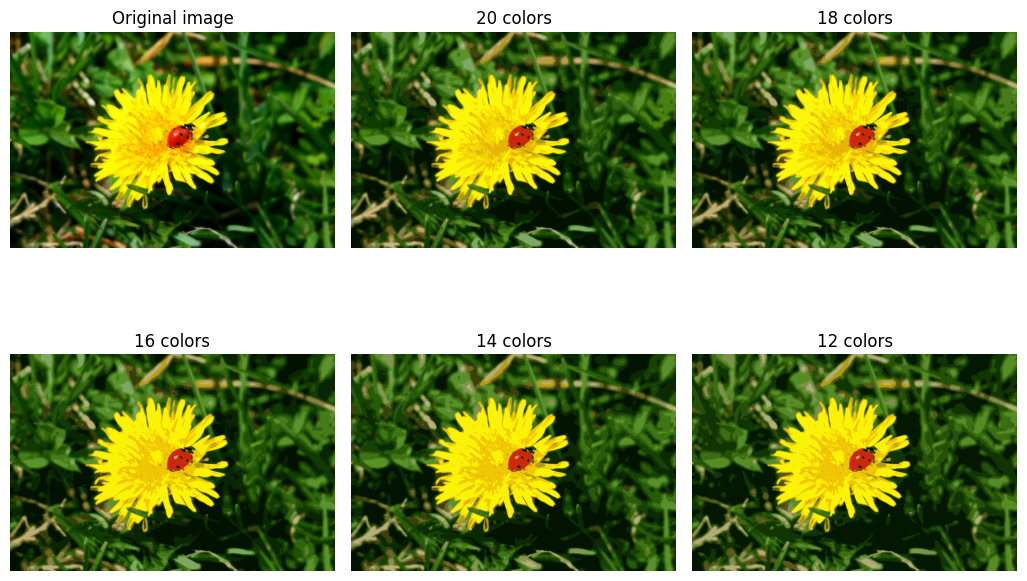

In [115]:
plt.figure(figsize=(13,8))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

#save_fig('image_segmentation_diagram', tight_layout=False)
plt.show()

### Aplicando el *clustering* para el preprocesamiento

Vamos a abordar el conjunto de datos *digits*, que es un conjunto de datos sencillo similar al *MNIST* que contiene 1.797 imágenes de 8×8 en escala de grises que representan los dígitos del 0 al 9.

In [5]:
from sklearn.datasets import load_digits

In [117]:
X_digits, y_digits = load_digits(return_X_y=True)

Vamos a dividirlo en un conjunto *train* y un conjunto *test*:

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

Ahora vamos a ajustar un modelo de Regresión Logística y evaluarlo en el conjunto *test*:

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [122]:
log_reg.score(X_test, y_test)

0.9688888888888889

Bien, ese es nuestro *baseline*: 96,89% de *accuracy*. Veamos si podemos hacerlo mejor utilizando *K-Means* como paso previo al procesamiento. Crearemos un proceso que primero agrupará el conjunto de entrenamiento en 50 clusters y reemplazará las imágenes con sus distancias a los 50 clusters, luego aplicará un modelo de Regresión Logística:

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [128]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=30, random_state=42)), # Utiliza solo X_train
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),# Utiliza X_train, y_train
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=30, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [129]:
pipeline.score(X_test, y_test)

0.98

¿Qué le parece? Hemos reducido la tasa de error en más de un 28%! Pero elegimos el número de *clusters* $k$ de forma completamente arbitraria, seguro que podemos hacerlo mejor. Dado que *K-Means* es sólo un paso de preprocesamiento en un proceso de clasificación, encontrar un buen valor para $k$ es mucho más sencillo que antes: no hay necesidad de realizar análisis de siluetas o minimizar la inercia, el mejor valor de $k$ es simplemente el que resulta en el mejor rendimiento de clasificación.

In [130]:
from sklearn.model_selection import GridSearchCV

In [132]:
param_grid = {"kmeans__n_clusters": range(2, 30)}

grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.0s
[CV] END ...............................kmeans__

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=30, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 30)}, verbose=2)

Veamos cuál es el mejor número de *clusters*:

In [133]:
grid_clf.best_params_

{'kmeans__n_clusters': 26}

In [134]:
grid_clf.score(X_test, y_test)

0.9666666666666667

In [136]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=26, random_state=42)), # Utiliza solo X_train
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),# Utiliza X_train, y_train
])
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.9666666666666667

### *Clustering* para Aprendizaje Semisupervisado

Otro caso de uso de *clusterización* es el Aprendizaje Semisupervisado, cuando tenemos muchas instancias sin etiquetar y muy pocas etiquetadas.

Veamos el rendimiento de un modelo de Regresión Logística cuando sólo tenemos 50 instancias etiquetadas:

In [7]:
X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

NameError: name 'train_test_split' is not defined

In [138]:
# Con todas las imágenes
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42, max_iter=5000)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9688888888888889

In [139]:
n_labeled = 50 #hay 50 imagenes con los que NO vamos a contar

In [140]:
# Con 50 imágenes
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled]) #cojemos los 50 primeros registros
log_reg.score(X_test, y_test)

0.8333333333333334

Es un resultado peor que el anterior (tiene sentido). Veamos cómo podemos hacerlo mejor. En primer lugar, agrupemos el conjunto de entrenamiento en 50 *clusters* y, a continuación, busquemos en cada *cluster* la imagen más cercana al centroide. A estas imágenes las llamaremos imágenes representativas:

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [142]:
k = 50

In [143]:
kmeans = KMeans(n_clusters=k, random_state=42)
# Con esto estamos encontrando las 50 imágenes más representativas del conjunto 'X_train'
print("X_train.shape:", X_train.shape)
print("X_train[0].shape:", X_train[0].shape)
X_digits_dist = kmeans.fit_transform(X_train)
# Cogemos las imágenes que menos distacia tengan a los 50 centroides
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
print("representative_digit_idx:", representative_digit_idx)
X_representative_digits = X_train[representative_digit_idx] #numero de registron que caen en cada centroide

X_train.shape: (1347, 64)
X_train[0].shape: (64,)
representative_digit_idx: [ 986  114  828   26  588  855  460  325  783  850  843  683  919  753
  159  817  348  481  791  861  509  704  780  689 1022  702  749  411
 1057  731   23 1196  841  648  976 1138  987   50  256  494  795 1005
  602  369 1056  357  176  647 1071  258]


In [144]:
X_representative_digits[0]

array([ 0.,  1.,  9., 15., 13.,  4.,  0.,  0.,  0.,  5., 12.,  4., 10.,
        6.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  2.,  0.,  0.,  0.,  0.,
        0., 15., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  9., 14.,  2.,
        0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0., 10.,  6.,
        4., 11.,  7.,  0.,  0.,  0.,  8., 15., 16.,  9.,  1.,  0.])

Ahora vamos a visualizar estas imágenes representativas y a etiquetarlas manualmente:

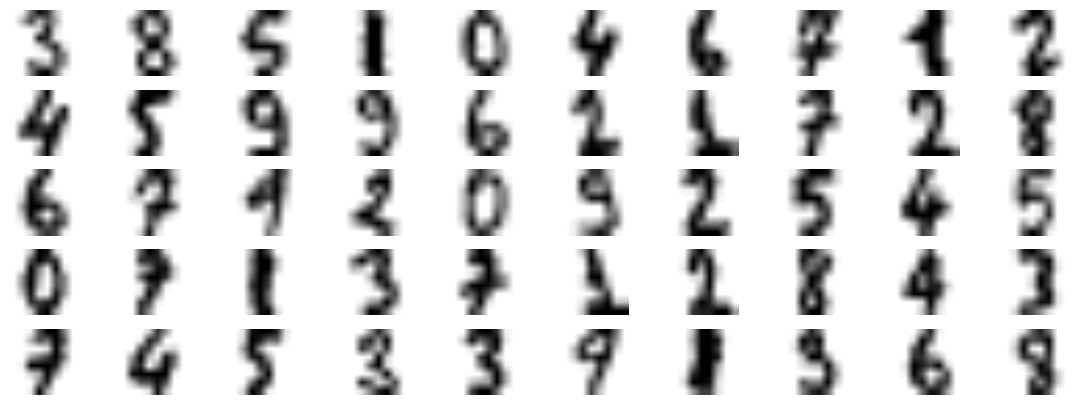

In [145]:
plt.figure(figsize=(14, 5))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

# save_fig("representative_images_diagram", tight_layout=False)
plt.show()

Ahora tenemos un conjunto de datos con sólo 50 instancias etiquetadas, pero en lugar de ser instancias completamente aleatorias, cada una de ellas es una imagen representativa de su *clúster*. Veamos si el rendimiento es mejor:

In [146]:
y_representative_digits = [list(y_train)[x] for x in representative_digit_idx]

In [147]:
len(y_representative_digits)

50

In [148]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8955555555555555

Vaya. Hemos pasado de una precisión del 83,3% al 89,5%, aunque todavía sólo estamos entrenando el modelo con 50 instancias. Dado que a menudo es costoso y *doloroso* etiquetar instancias, especialmente cuando lo tienen que hacer manualmente expertos, es una buena idea hacer que etiqueten instancias representativas en lugar de instancias aleatorias.

Pero quizá podamos ir un paso más allá: ¿y si propagamos las etiquetas a todas las demás instancias del mismo clúster?

In [149]:
print("X_train.shape:", X_train.shape)

X_train.shape: (1347, 64)


In [152]:
1347- 50

1297

In [151]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
# Para cada uno de los dígitos que están en los diferentes clusters, forzamos a que se le asigne la etiqueta del dígito que está más cerca del centroide.
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
y_train_propagated

array([5, 2, 0, ..., 2, 7, 1])

In [153]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [154]:
log_reg.score(X_test, y_test)

0.9288888888888889

Hemos conseguido un pequeño aumento del *accuracy*. Mejor que nada, pero probablemente deberíamos haber propagado las etiquetas sólo a las instancias más cercanas al centroide, porque al propagarlas a todo el *clúster*, sin duda hemos incluido algunos valores atípicos. Propaguemos las etiquetas sólo al percentil 20 más cercano al centroide:

In [155]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [156]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [157]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [158]:
log_reg.score(X_test, y_test)

0.9244444444444444

¡Muy bueno! Con sólo 50 instancias etiquetadas (¡sólo 5 ejemplos por clase de media!), obtuvimos un rendimiento del 92.4%, que se acerca al rendimiento de la Regresión Logística en el conjunto de datos *digits* totalmente etiquetado (que fue del 96,9%).

Esto se debe a que las etiquetas propagadas son bastante buenas: su precisión es muy cercana al 99%:

In [159]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9826388888888888

Ahora podrías hacer algunas iteraciones de *active learning*:
1. Etiquetar manualmente las instancias de las que el clasificador está menos seguro, si es posible seleccionándolas en *clusters* distintos.
2. Entrenar un nuevo modelo con estas etiquetas adicionales.

## *Density-Based Spatial Clustering of Applications with Noise* (*DBSCAN*)

Los algoritmos de *clustering* (variantes del *K-Means*) vistos hasta ahora, se basan en la distancia entre las instancias (instancias y centroides). Ahora, veamos un algoritmo basado en desidades.

El algoritmo *DBSCAN* agrupa instancias que estén cerca unas de otras en función de su densidad en el espacio de características (variables explicativas), no es necesario especificar el número de *clusters* y es capaz de detectar ruido. Se basa en dos parámetros principales: epsilon (`eps`, $\epsilon$) y el número mínimo de puntos (`min_samples`). Epsilon determina la distancia máxima entre dos puntos para que uno se considere vecino del otro. `min_sample` especifica el número mínimo de puntos que deben estar dentro de un radio de $\epsilon$ para que un punto sea considerado núcleo. Existen tres tipos de puntos, puntos núcleo, puntos frontera y ruido, para más información consultar [la documentación](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN).

In [9]:
from sklearn.datasets import make_moons

In [10]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [11]:
print(X,y)

[[-0.02137124  0.40618608]
 [ 0.97670045 -0.45832306]
 [ 0.90405882 -0.37651952]
 ...
 [ 1.66258462 -0.3079193 ]
 [-0.94355873  0.3278936 ]
 [ 0.79419406  0.60777171]] [1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1
 0 0 1 

In [12]:
from sklearn.cluster import DBSCAN

In [13]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [14]:
dbscan.labels_[:10] #-1: no ha sido clasificado en un cluster

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [15]:
len(dbscan.core_sample_indices_)

808

In [16]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [17]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [18]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [19]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [20]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

Saving figure dbscan_plot


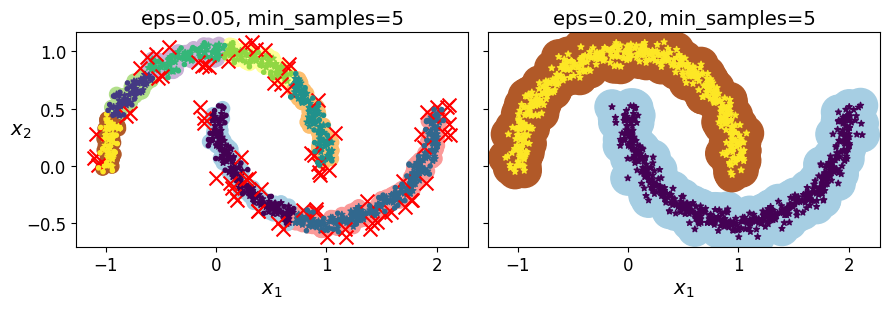

In [21]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

save_fig("dbscan_plot")
plt.show()


In [22]:
dbscan = dbscan2

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [25]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [26]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

Saving figure cluster_classification_plot


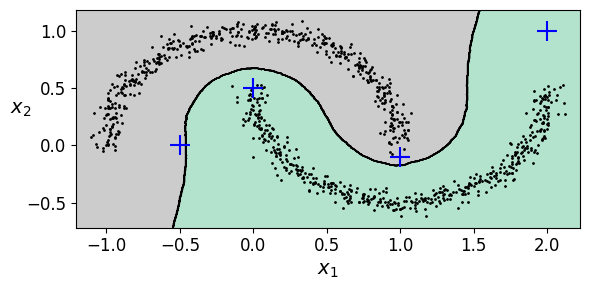

In [29]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
save_fig("cluster_classification_plot")
plt.show()

In [30]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

## Otros algoritmos de *clustering*

### *Spectral Clustering*

Es un algoritmo de *clustering* que se basa en la teoría de grafos y el análisis de valores propios y vectores propios de matrices asociadas a los datos. En concreto, se construye una matriz de similitud entre los puntos de los datos (utilizando métricas de distancias, como la Distancia Euclidea o la Similitud del Coseno), dependiendo del tipo de datos y el problema específico. A partir de la matriz de similitud, se construye la matriz Laplaciana (matriz que captura la estructura de conectividad entre los puntos de datos) y se utiliza para el análisis espectral. Se calculan los primeros $k$ (número de *clusters* deseado) valores y vectores propios. Gracias a los vectores propios obtenidos podemos respresentar los datos en un espacio de dimensión reducida y se utilizan para realizar el *clustering*. Para esta última parte, el algoritmo puede aplicar un *K-Means* sobre los nuevos datos.

El algoritmo de *clustering* espectral es útil para encontrar estructuras de *clusters* no lineales en conjuntos de datos, especialmente cuando los datos tienen una estructura intrínseca complicada o no pueden ser separados linealmente en el espacio de características original.

A pesar de sus ventajas, el algoritmo puede ser computacionalmente costoso, especialmente cuando se trabaja con conjuntos de datos grandes, ya que implica el cálculo y la manipulación de matrices de alta dimensionalidad. Sin embargo, ofrece una poderosa herramienta para el análisis de datos y la extracción de información en una amplia gama de aplicaciones.

##### **Proceso:**

1. Se calcula la **matriz de distancias** $D$:

$$D = \begin{pmatrix} 
d_{11} & d_{12} & \dots  & d_{1n} \\
d_{21} & d_{22} & \dots  & d_{2n} \\
\vdots & \dots  & \ddots & \vdots \\
d_{n1} & \dots  & \dots  & d_{nn}
\end{pmatrix} \text{, donde } d_{ij} \text{ es la distancia del i-ésimo al j-ésimo registro.}$$

2. Se obtiene la **matriz de similitudes** $S$ utilizando el kernel guassiano:

$$ e^{-\dfrac{d^{2}_{ij}}{2\sigma^{2}}}, \text{donde } d_{ij} \text{ es la distancia entre los puntos } i \text{ y } j \text{, y } \sigma \text{ es un parámetro que controla la anchura del kernel.}$$
$$\text{Supongamos por simplicidad, que } \sigma=1 \text{ Entonces, la matriz de similitud } S \text{ se calcula de la siguiente manera:}$$

$$S = \begin{pmatrix} 
s_{11} & s_{12} & \dots  & s_{1n} \\
s_{21} & s_{22} & \dots  & s_{2n} \\
\vdots & \dots  & \ddots & \vdots \\
s_{n1} & \dots  & \dots  & s_{nn}
\end{pmatrix} \text{, donde } S_{ij} = e^{-\dfrac{d^{2}_{ij}}{2}} $$

3. Se calcula la **matriz de grado** $F$: sumando las similitudes de cada fila 

$$F_{ii} = \sum_{j=1}^{n} S_{ij} \text{ , es decir,  } F = \begin{pmatrix} 
s_{11} + s_{12} + ... + s_{1n} & 0                              & \dots  & 0      \\
0                              & s_{21} + s_{22} + ... + s_{2n} & \dots  & 0      \\
0                              & \dots                          & \ddots & \vdots \\
0                              & \dots                          & \dots  & s_{n1} + s_{n2} + ... + s_{nn}
\end{pmatrix}$$

4. Por último, se calcula la **matriz Laplaciana** $L$:  

$$L = I - F^{-1/2}SF^{-1/2}$$

De la cual, se calculan los $k$ valores propios y sus respectivos vectores propios, y se construyen las nuevas dimensiones en las que se aplica un algoritmo de *clustering* como *K-Means*.


**Métricas de distancia:** Distancia Euclidea, Distancia Manhatan, Distancia de Minkowski, Distancia de Hamming, Distancia de Jaccardi, Distancia del Coseno. 

In [31]:
from sklearn.cluster import SpectralClustering

In [32]:
sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

SpectralClustering(gamma=100, n_clusters=2, random_state=42)

In [33]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

In [34]:
np.percentile(sc1.affinity_matrix_, 95)

0.04251990648936265

In [35]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

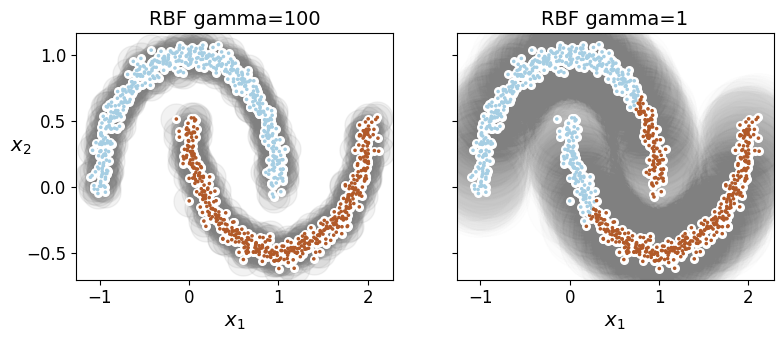

In [36]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()


### *Agglomerative Clustering*

Es un algoritmo de *clustering* jerárquico que construye una jerarquía de *clusters* mediante la unión gradual de las instancias más cercanas o similares.


##### **Proceso:**

1. **Inicialización**: Inicialmente, cada instancia de datos se considera un *cluster* individual.

2. Calculo de la **matriz de distancias**: se calcula la matriz de distancias entre todos los pares de *clusters*. La distancia entre dos *clusters* puede ser calculada utilizando diferentes métricas, como la distancia euclidea, la distancia de Manhattan, la distancia de Minkowski, etc.

3. **Unión de clusters**: seleccionamos los dos *clusters* más cercanos o similares según la distancia definida y los fusionamos en un nuevo *cluster*. Este proceso se repite hasta que todos los puntos de datos estén en un único *cluster* o hasta que se cumpla algún criterio de parada predefinido.

4. Construcción de la **jerarquía**: durante el proceso de unión, se construye una jerarquía de *clusters* en forma de un dendrograma, que muestra cómo se agrupan los puntos de datos en diferentes niveles de similitud.

5. **Criterio de parada**: algunos criterios comunes de parada incluyen el número deseado de *clusters*, un umbral de distancia específico entre *clusters* o la altura del dendrograma.

El *clustering* aglomerativo es intuitivo y fácil de entender, ya que la jerarquía de *clusters* se puede visualizar fácilmente en un dendrograma. Sin embargo, puede ser computacionalmente costoso, especialmente para grandes conjuntos de datos, ya que requiere el cálculo y la actualización de la matriz de distancias en cada iteración.

Una vez que se ha construido el dendrograma, se puede seleccionar el número adecuado de clusters cortando el dendrograma en un punto que tenga sentido según el contexto del problema. Este punto de corte puede ser determinado visualmente o utilizando técnicas automáticas, como el método del codo o el método de la silueta.

En resumen, el *clustering* aglomerativo es un método poderoso para encontrar estructuras de agrupamiento en conjuntos de datos, especialmente cuando se necesita una representación jerárquica de los *clusters* y cuando no se conoce de antemano el número de *clusters*.

In [37]:
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris

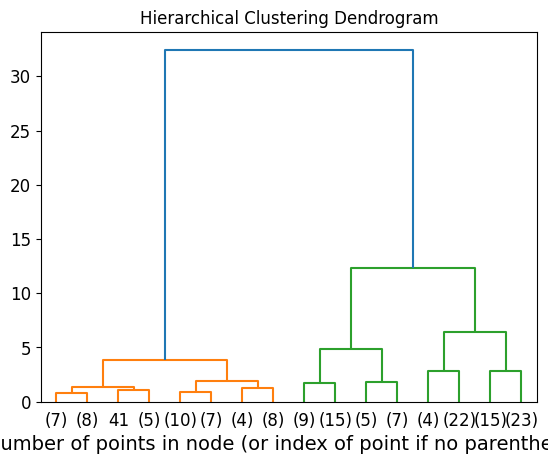

In [38]:
def plot_dendrogram(model, **kwargs):
    # Calcular el número de instancias bajo cada nodo
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Visualizar el dendograma
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data


model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

- Los numeros debajo de la grafics: Numero de puntos que cae en cada nodo
- Hacemos un corte y el, numero de lineas que sale son los clusters resultantes

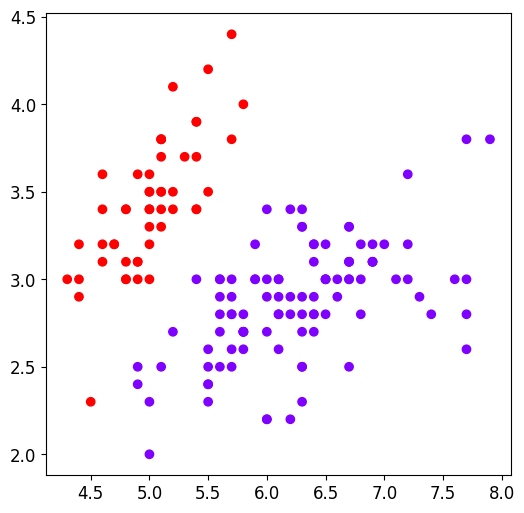

In [48]:
ac2 = AgglomerativeClustering(n_clusters = 2)
 
plt.figure(figsize =(6, 6))
plt.scatter(X[:,0], X[:,1], 
           c = ac2.fit_predict(X), cmap ='rainbow')
plt.show()

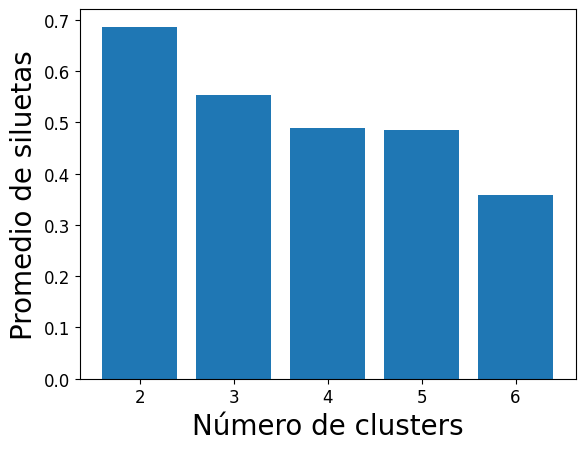

In [49]:
ac3 = AgglomerativeClustering(n_clusters = 3)
ac4 = AgglomerativeClustering(n_clusters = 4)
ac5 = AgglomerativeClustering(n_clusters = 5)
ac6 = AgglomerativeClustering(n_clusters = 6)

k = [2, 3, 4, 5, 6]
 
# Aplmacenamos los resultados de las siluetas para cada cluster
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X, ac2.fit_predict(X)))
silhouette_scores.append(
        silhouette_score(X, ac3.fit_predict(X)))
silhouette_scores.append(
        silhouette_score(X, ac4.fit_predict(X)))
silhouette_scores.append(
        silhouette_score(X, ac5.fit_predict(X)))
silhouette_scores.append(
        silhouette_score(X, ac6.fit_predict(X)))
 
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Número de clusters', fontsize = 20)
plt.ylabel('Promedio de siluetas', fontsize = 20)
plt.show()

### *Gaussian Mixtures*

Las mixturas gaussianas (Gaussian Mixture Models - GMM) son modelos probabilísticos utilizados para describir la distribución de datos en un espacio multidimensional. Estos modelos asumen que los datos son generados por la combinación de múltiples distribuciones gaussianas (también conocidas como distribuciones normales), cada una con sus propios parámetros de media y covarianza.

Aquí tienes una descripción general de cómo funcionan y cómo se utilizan:

**Definición del modelo** (matemática): Un modelo de mixturas gaussianas asume que los datos provienen de la combinación ponderada de varias distribuciones gaussianas. Es decir, si tenemos $K$ componentes en la mezcla, cada punto de datos se asume que proviene de una de estas $K$ distribuciones, donde la probabilidad de que provenga de cada componente se pondera por un coeficiente $\pi_{k}$. Matemáticamente, la densidad de probabilidad de un punto de datos $x$ se define como:

$$p(x) = \sum_{k=1}^{K} \pi_{k} \times N(x | \mu_{k}, \Sigma_{k})$$ 

donde $N(x | \mu_{k}, \Sigma_{k})$ es la función de densidad de probabilidad de una distribución gaussiana con media $\mu_{k}$ y matriz de covarianza $\Sigma_{k}$.


1. **Estimación de parámetros**: Los parámetros del modelo, es decir, las medias $\mu_{k}$, las matrices de covarianza​ $\Sigma_{k}$ y los coeficientes de mezcla $\pi_{k}$, se estiman a partir de los datos de entrada. Esto generalmente se hace mediante el algoritmo de Expectation-Maximization (EM), que es un algoritmo iterativo que busca maximizar la verosimilitud de los datos.

1. **Asignación de *clusters***: Una vez que se han estimado los parámetros del modelo, podemos usarlos para asignar puntos de datos a *clusters*. Esto se hace típicamente asignando cada punto al *cluster* con la probabilidad más alta dada su distribución gaussiana correspondiente.

1. **Predicción y generación de datos**: Una vez que el modelo está ajustado, se puede utilizar para predecir la probabilidad de nuevos puntos de datos y también para generar nuevos datos que sigan la misma distribución que los datos de entrada.

Las mixturas gaussianas son útiles cuando los datos no se ajustan bien a un solo modelo de distribución gaussiana, pero pueden describirse bien mediante una combinación de varias distribuciones gaussianas. Son ampliamente utilizadas en tareas de *clustering*, modelado de densidad, detección de anomalías y generación de datos.

- Mixtura: conbinacion de varias distribuciones

Puede crear datos sinteticos (nuevos) con los datos que tenemos (media,varianza) sin alterar la distribucion

In [53]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

Vamos a entrenar un modelo de mixtura gaussiana en el *dataset* previo:

In [54]:
from sklearn.mixture import GaussianMixture

In [55]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

Echemos un vistazo a los parámetros estimados por el algoritmo *EM*:

In [61]:
gm.weights_ #coeficientes (el pi_k)

array([0.40005972, 0.20961444, 0.39032584])

In [57]:
gm.means_

array([[-1.40764129,  1.42712848],
       [ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576]])

In [58]:
gm.covariances_ #resultadi: trees matrices de cobarianzas de 2x2

array([[[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]]])

¿Convergió realmente el algoritmo?

In [59]:
gm.converged_ #queremos que sea true, tiene que converger (si es false no es una solucion optima, diverge. En ese caso hay que cambiar parametros)

True

Sí, bien. ¿Cuántas iteraciones tomó?

In [60]:
gm.n_iter_ #cuantas iteraciones a necesitado para encontrar

4

Ahora puede utilizar el modelo para predecir a qué *cluster* pertenece cada instancia (*hard clustering*) o las probabilidades de que proceda de cada *cluster*. Para ello, utilice el método `predict()` o el método `predict_proba()` (respectivamente):

In [62]:
gm.predict(X)

array([2, 2, 0, ..., 1, 1, 1], dtype=int64)

In [63]:
gm.predict_proba(X)

array([[6.76282339e-07, 2.31833274e-02, 9.76815996e-01],
       [6.74575575e-04, 1.64110061e-02, 9.82914418e-01],
       [9.99922764e-01, 1.99781831e-06, 7.52377580e-05],
       ...,
       [2.12540639e-26, 9.99999568e-01, 4.31902443e-07],
       [1.45002917e-41, 1.00000000e+00, 5.20915318e-16],
       [7.93266114e-41, 1.00000000e+00, 2.30971331e-15]])

Se trata de un modelo generativo, por lo que puede muestrear nuevas instancias a partir de él (y obtener sus etiquetas):

- Algoritmos generativos: algoritmos que son capaces de crear una imagen nueva

In [64]:
X_new, y_new = gm.sample(6) #creación de registros sinteticos
X_new

array([[-2.32491052,  1.04752548],
       [-1.16654983,  1.62795173],
       [ 1.84860618,  2.07374016],
       [ 3.98304484,  1.49869936],
       [ 3.8163406 ,  0.53038367],
       [ 0.38079484, -0.56239369]])

In [65]:
y_new

array([0, 0, 1, 1, 1, 2])

Observe que se toman muestras secuenciales de cada *cluster*.

También puede estimar el logaritmo de la función de densidad de probabilidad (FDP) en cualquier ubicación utilizando el método `score_samples()`:

In [66]:
gm.score_samples(X)

array([-2.60786904, -3.57094519, -3.3302143 , ..., -3.51359636,
       -4.39793229, -3.80725953])

Comprobemos que la FDP se integra a 1 en todo el espacio. Tomamos un cuadrado grande alrededor de los *clusters* y lo dividimos en una cuadrícula de cuadrados diminutos; a continuación, calculamos la probabilidad aproximada de que las instancias se generen en cada cuadrado diminuto (multiplicando la FDP en una esquina del cuadrado diminuto por el área del cuadrado) y, por último, sumamos todas estas probabilidades). El resultado es muy próximo a 1:

In [67]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999225081

Ahora vamos a trazar los límites de decisión resultantes (líneas discontinuas) y los contornos de densidad:

In [68]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure gaussian_mixtures_plot


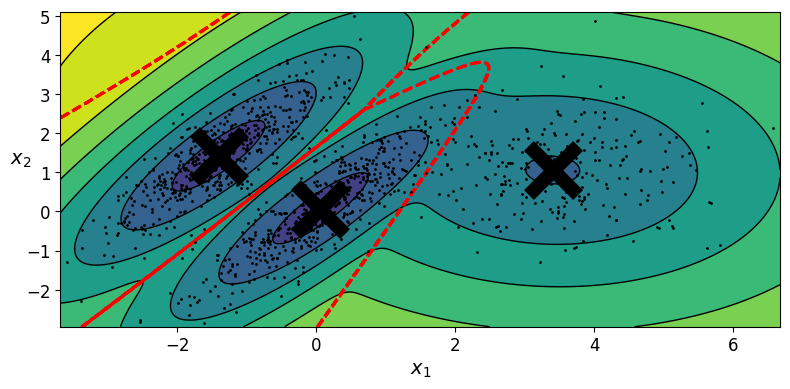

In [69]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

save_fig("gaussian_mixtures_plot")
plt.show()

Puede imponer restricciones a las matrices de covarianza que busca el algoritmo estableciendo el hiperparámetro `covariance_type`:
* `"full"` (por defecto): sin restricciones, todos los *clusters* pueden tener forma elipsoidal de cualquier tamaño.
* `"tied"`: todos los *clusters* conglomerados deben tener la misma forma, que puede ser cualquier elipsoide (es decir, todos comparten la misma matriz de covarianza).
* `"spherical"`: todos los *clusters* deben ser esféricos, pero pueden tener diámetros diferentes (es decir, varianzas diferentes).
* `"diag"`: los *clusters* pueden tener cualquier forma elipsoidal de cualquier tamaño, pero los ejes del elipsoide deben ser paralelos a los ejes (es decir, las matrices de covarianza deben ser diagonales).

In [70]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

In [71]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)


Saving figure covariance_type_plot


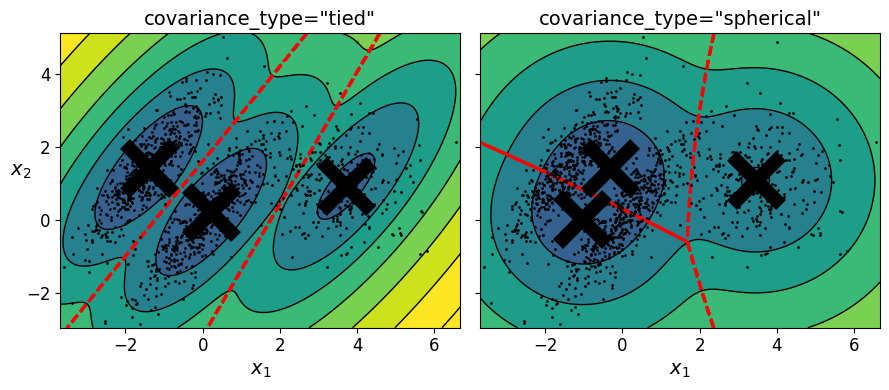

In [72]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)

save_fig("covariance_type_plot")
plt.show()

parametro inportante: covarianza. Afecta directamente al resultado original.

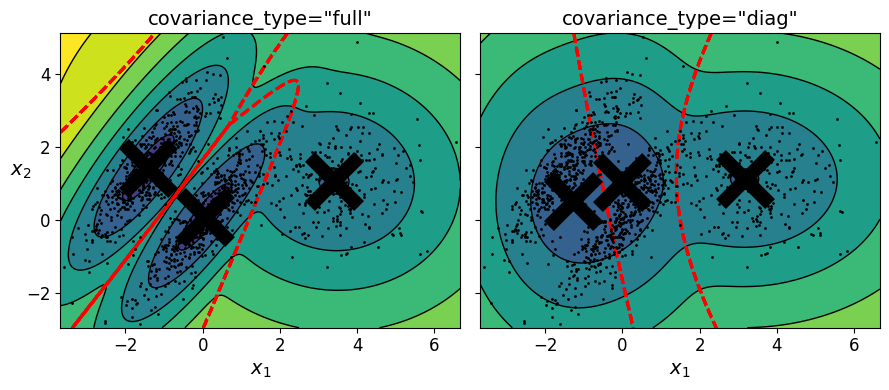

In [73]:
compare_gaussian_mixtures(gm_full, gm_diag, X) 
plt.tight_layout()
plt.show()

## Aplicación de *Gaussian Mixtures* 

### Detección de anomalias

Las mixturas gaussianas pueden utilizarse para la *detección de anomalías*: las instancias situadas en regiones de baja densidad pueden considerarse anomalías. Debe definir qué umbral de densidad desea utilizar. Por ejemplo, en una empresa de fabricación que intenta detectar productos defectuosos, la proporción de productos defectuosos suele ser bien conocida. Digamos que es igual a 4%, entonces puede establecer el umbral de densidad para que sea el valor que resulta en tener 4% de las instancias localizadas en áreas por debajo de ese umbral de densidad:

In [74]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

Saving figure mixture_anomaly_detection_plot


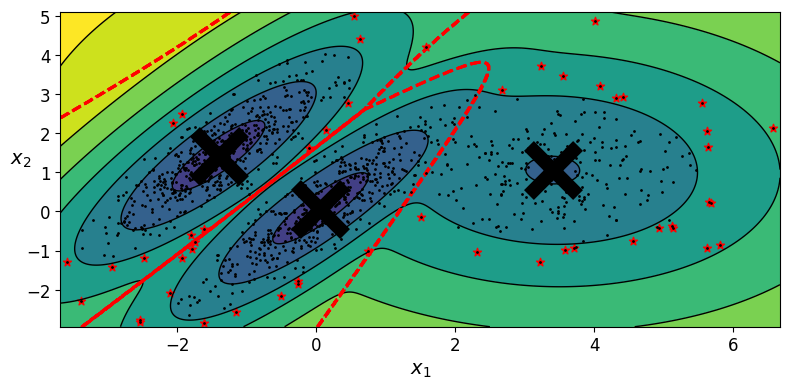

In [75]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

save_fig("mixture_anomaly_detection_plot")
plt.show()

## Selección del modelo

No podemos utilizar la inercia o la puntuación de silueta porque ambas suponen que los *clusters* son esféricos. En su lugar, podemos intentar encontrar el modelo que minimice un criterio de información teórico como el Criterio de Información Bayesiano (*Bayesian Information Criterion*, *BIC*) o el Criterio de Información de Akaike (*Akaike Information Criterion*, *AIC*):

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

* $m$ es el número de instancias.
* $p$ es el número de parámetros ajustados por el modelo.
* $\hat L$ es el valor maximizado de la función de verosimilitud del modelo. Es la probabilidad condicional de los datos observados $\mathbf{X}$, dado el modelo y sus parámetros optimizados.

Tanto el *BIC* como el *AIC* penalizan los modelos que tienen más parámetros que aprender (por ejemplo, más *clusters*) y recompensan los modelos que se ajustan bien a los datos (es decir, los modelos que dan una alta probabilidad a los datos observados).

El AIC intenta hacer el valanceo entre lo complejo que es el modelo y 

In [76]:
gm.bic(X)

8189.733705221636

In [77]:
gm.aic(X)

8102.508425106598

Podríamos calcular el *BIC* manualmente así:

In [78]:
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood # 2*log(n)*k - 2*log(L)
aic = 2 * n_params - 2 * max_log_likelihood # 2*k - 2*log(L)

In [79]:
bic, aic

(8189.733705221636, 8102.508425106598)

In [80]:
n_params

17

Hay un peso por *cluster*, pero la suma debe ser igual a 1, por lo que tenemos un grado de libertad menos, de ahí el -1. Del mismo modo, los grados de libertad para una matriz de covarianza $n \times n$ no es $n^2$, sino $1 + 2 + \dots + n = \dfrac{n (n+1)}{2}$.

Vamos a entrenar modelos de mixturas gaussianas con varios valores de $k$ y medir su *BIC*:

In [81]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

In [82]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

Saving figure aic_bic_vs_k_plot


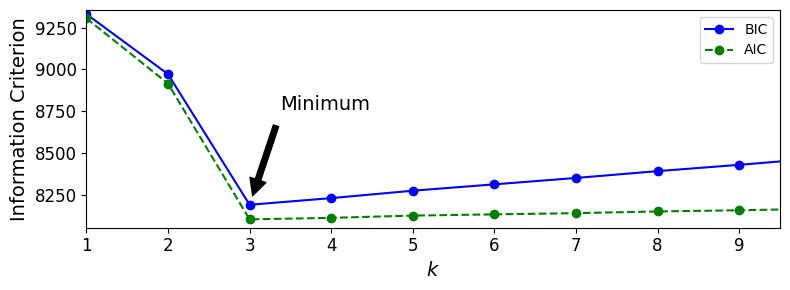

In [83]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
save_fig("aic_bic_vs_k_plot")
plt.show()

Busquemos la mejor combinación de valores tanto para el número de *clusters* como para el hiperparámetro `covariance_type`:

In [84]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [85]:
best_k

3

In [86]:
best_covariance_type

'full'

## Mixturas Bayesianas Gaussianas Variacionales (*Variational Bayesian Gaussian Mixtures*)

En lugar de buscar manualmente el número óptimo de *clusters*, es posible utilizar en su lugar la clase `BayesianGaussianMixture` que es capaz de dar pesos iguales (o cercanos) a cero a los *clusters* innecesarios. Basta con establecer el número de componentes en un valor que considere superior al número óptimo de *clusters*, y el algoritmo eliminará automáticamente los *clusters* innecesarios.

In [87]:
from sklearn.mixture import BayesianGaussianMixture

In [88]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

El algoritmo detecta automáticamente que solo se necesitan 3 componentes:

In [89]:
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.  , 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

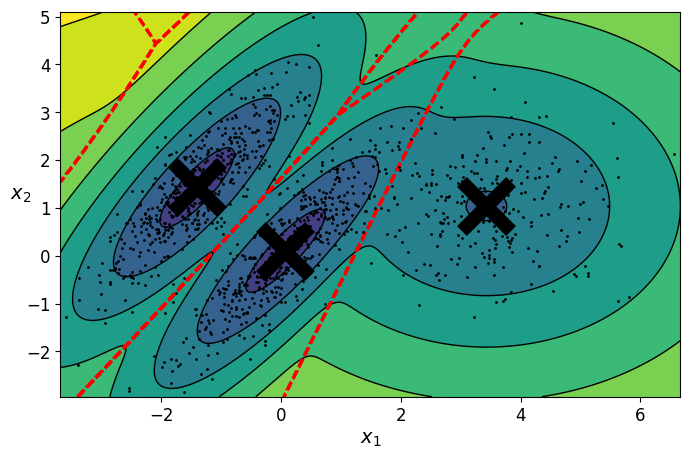

In [90]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

In [91]:
bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=0.01, random_state=42)
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=10000, random_state=42)
nn = 73
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])

BayesianGaussianMixture(max_iter=1000, n_components=10, random_state=42,
                        weight_concentration_prior=10000)

Saving figure mixture_concentration_prior_plot


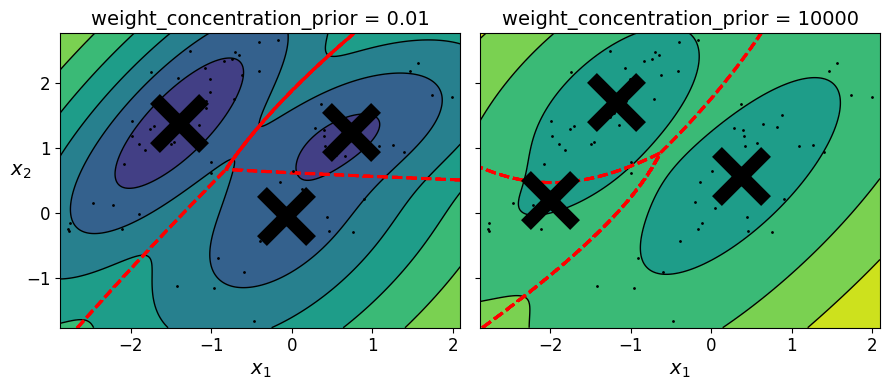

In [92]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, X[:nn], show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)

save_fig("mixture_concentration_prior_plot")
plt.show()

In [93]:
display(np.round(bgm_low.weights_,2), np.round(bgm_high.weights_, 2))

array([0.25, 0.26, 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

array([0.43, 0.01, 0.37, 0.01, 0.01, 0.01, 0.11, 0.01, 0.01, 0.01])

Nota: en el segundo *clustering* los pesos se han distribuido en más de 3 *clusters*, pero con un peso muy bajo. En el primer *clustering* el peso del *clúster* superior derecho es mucho mayor que el peso del *clúster* inferior derecho, por lo que la probabilidad de que cualquier punto de esta región pertenezca al *clúster* superior derecho es mayor que la probabilidad de que pertenezca al *clúster* inferior derecho.

In [94]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [95]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

Saving figure moons_vs_bgm_plot


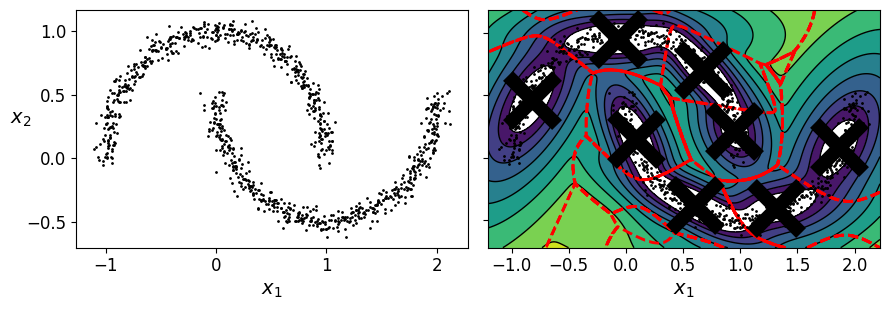

In [96]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

save_fig("moons_vs_bgm_plot")
plt.show()

Uy, no muy bien... en lugar de detectar 2 *clusters* con forma de luna, el algoritmo detectó 8 *clusters* elipsoidales. Sin embargo, el gráfico de densidad no tiene tan mal aspecto, así que podría servir para detectar anomalías.

## <font color='red'>Función de Verosimilitud (Likelihood Fucntion) ESTA SECCIÓN TAL VEZ SE ELIMINE</font>

In [97]:
from scipy.stats import norm

In [98]:
xx = np.linspace(-6, 4, 101)
ss = np.linspace(1, 2, 101)
XX, SS = np.meshgrid(xx, ss)
ZZ = 2 * norm.pdf(XX - 1.0, 0, SS) + norm.pdf(XX + 4.0, 0, SS)
ZZ = ZZ / ZZ.sum(axis=1)[:,np.newaxis] / (xx[1] - xx[0])

Saving figure likelihood_function_plot


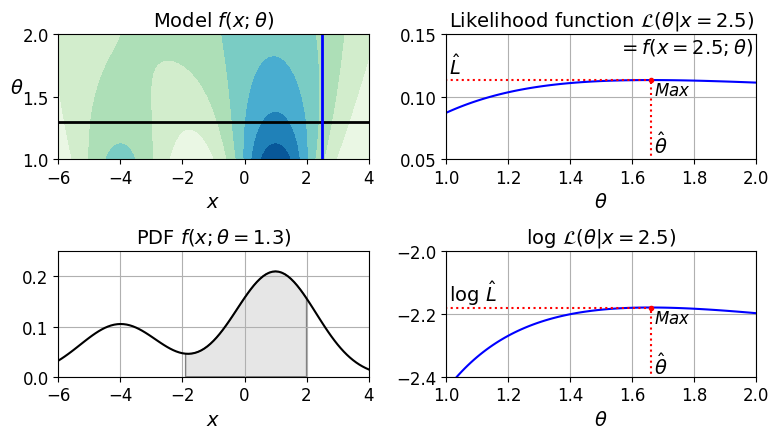

In [99]:
from matplotlib.patches import Polygon

plt.figure(figsize=(8, 4.5))

x_idx = 85
s_idx = 30

plt.subplot(221)
plt.contourf(XX, SS, ZZ, cmap="GnBu")
plt.plot([-6, 4], [ss[s_idx], ss[s_idx]], "k-", linewidth=2)
plt.plot([xx[x_idx], xx[x_idx]], [1, 2], "b-", linewidth=2)
plt.xlabel(r"$x$")
plt.ylabel(r"$\theta$", fontsize=14, rotation=0)
plt.title(r"Model $f(x; \theta)$", fontsize=14)

plt.subplot(222)
plt.plot(ss, ZZ[:, x_idx], "b-")
max_idx = np.argmax(ZZ[:, x_idx])
max_val = np.max(ZZ[:, x_idx])
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [0, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.text(1.01, max_val + 0.005, r"$\hat{L}$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, 0.055, r"$\hat{\theta}$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, max_val - 0.012, r"$Max$", fontsize=12)
plt.axis([1, 2, 0.05, 0.15])
plt.xlabel(r"$\theta$", fontsize=14)
plt.grid(True)
plt.text(1.99, 0.135, r"$=f(x=2.5; \theta)$", fontsize=14, ha="right")
plt.title(r"Likelihood function $\mathcal{L}(\theta|x=2.5)$", fontsize=14)

plt.subplot(223)
plt.plot(xx, ZZ[s_idx], "k-")
plt.axis([-6, 4, 0, 0.25])
plt.xlabel(r"$x$", fontsize=14)
plt.grid(True)
plt.title(r"PDF $f(x; \theta=1.3)$", fontsize=14)
verts = [(xx[41], 0)] + list(zip(xx[41:81], ZZ[s_idx, 41:81])) + [(xx[80], 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
plt.gca().add_patch(poly)

plt.subplot(224)
plt.plot(ss, np.log(ZZ[:, x_idx]), "b-")
max_idx = np.argmax(np.log(ZZ[:, x_idx]))
max_val = np.max(np.log(ZZ[:, x_idx]))
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [-5, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.axis([1, 2, -2.4, -2])
plt.xlabel(r"$\theta$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, max_val - 0.05, r"$Max$", fontsize=12)
plt.text(ss[max_idx]+ 0.01, -2.39, r"$\hat{\theta}$", fontsize=14)
plt.text(1.01, max_val + 0.02, r"$\log \, \hat{L}$", fontsize=14)
plt.grid(True)
plt.title(r"$\log \, \mathcal{L}(\theta|x=2.5)$", fontsize=14)

save_fig("likelihood_function_plot")
plt.show()